## **SALES PREDICTION ANALYSIS**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [7]:
corr_matrix = data.corr()
print(corr_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


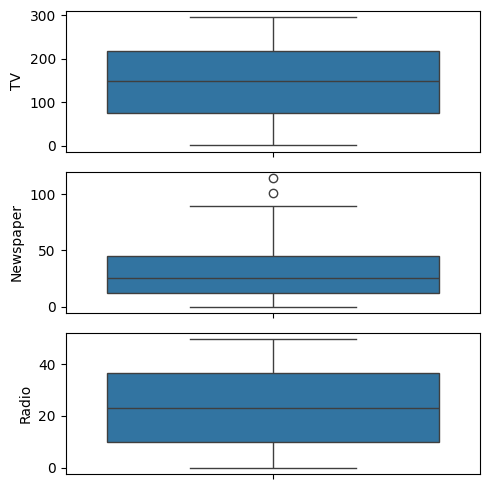

In [8]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

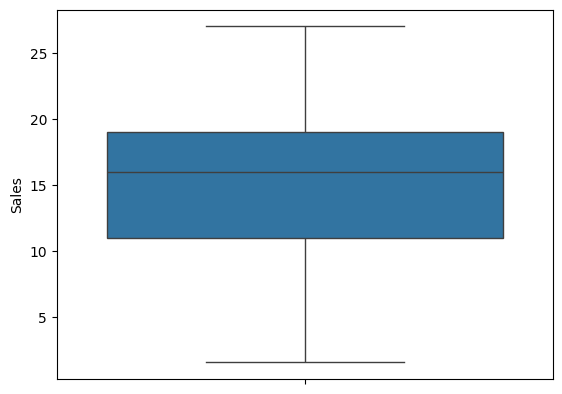

In [9]:
sns.boxplot(data['Sales'])
plt.show()

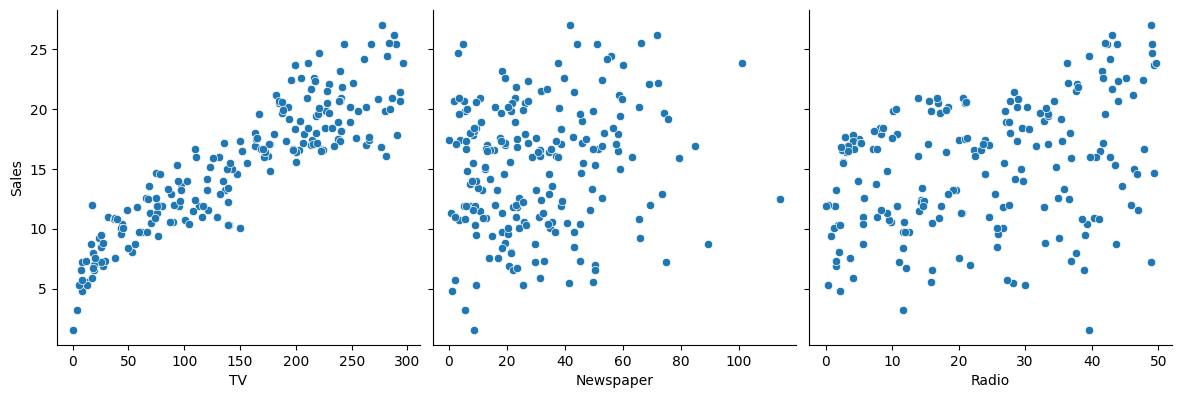

In [10]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

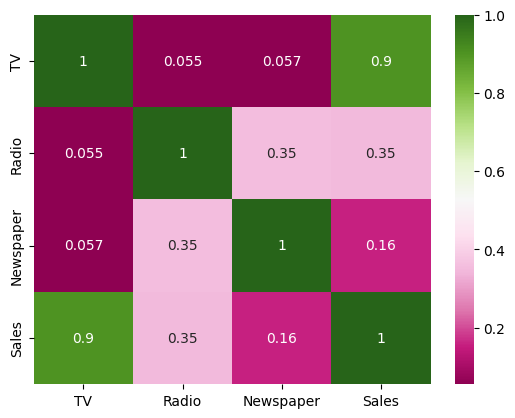

In [11]:
sns.heatmap(data.corr(), cmap="PiYG", annot = True)
plt.show()

In [12]:
X = data['TV']
y = data['Sales']

#### Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 200)

In [14]:
X_train.head()

111    241.7
86      76.3
172     19.6
101    296.4
127     80.2
Name: TV, dtype: float64

In [15]:
y_train.head()

111    21.8
86     12.0
172     7.6
101    23.8
127    11.9
Name: Sales, dtype: float64

In [16]:
import statsmodels.api as sm

In [17]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [18]:
#parameters
lr.params

const    7.239987
TV       0.053770
dtype: float64

In [19]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     612.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           3.07e-56
Time:                        10:28:09   Log-Likelihood:                -359.55
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2400      0.372     19.439      0.0

The provided OLS (Ordinary Least Squares) regression results summary provides several key pieces of information about the regression model and its performance. Here are the important conclusions that can be drawn:

### 1. **Model Fit**:
- **R-squared: 0.795**: This indicates that approximately 79.5% of the variability in the dependent variable (Sales) is explained by the independent variable (TV). This suggests a strong fit of the model to the data.
- **Adj. R-squared: 0.794**: The adjusted R-squared is very close to the R-squared value, indicating that the model is robust and not overly complex.

### 2. **Model Significance**:
- **F-statistic: 612.5** and **Prob (F-statistic): 3.07e-56**: The F-statistic is very high, and the p-value is extremely low (essentially zero). This means the model as a whole is statistically significant, and there is a very strong relationship between TV advertising and Sales.

### 3. **Coefficients**:
- **Intercept (const): 7.2400**: This is the estimated sales when TV advertising is zero. It is statistically significant with a p-value of 0.000.
- **TV: 0.0538**: For every unit increase in TV advertising, sales increase by approximately 0.0538 units. This coefficient is also highly significant with a p-value of 0.000.

### 4. **Statistical Tests**:
- **Durbin-Watson: 2.082**: This statistic tests for the presence of autocorrelation in the residuals. A value around 2 suggests that there is no significant autocorrelation.
- **Omnibus, Prob(Omnibus), Jarque-Bera (JB), Prob(JB), Skew, Kurtosis**: These tests are for normality of the residuals. The p-values for Omnibus and Jarque-Bera are very high (1.000 and 0.973, respectively), indicating that the residuals are normally distributed.

### 5. **Model Diagnostics**:
- **Cond. No. (Condition Number): 351**: This number indicates the sensitivity of the model to multicollinearity. A value below 1000 is generally considered acceptable, so there are no immediate concerns about multicollinearity.

### Overall Summary:
- The regression model explains a substantial portion of the variance in Sales, with a strong and significant relationship between TV advertising and Sales.
- The model appears to be well-specified with normally distributed residuals and no significant autocorrelation.
- The high F-statistic and very low p-value for the model indicate that TV advertising is a strong predictor of Sales.

These results suggest that the TV advertising variable is a significant and important predictor of sales, and the model itself is statistically robust and reliable.

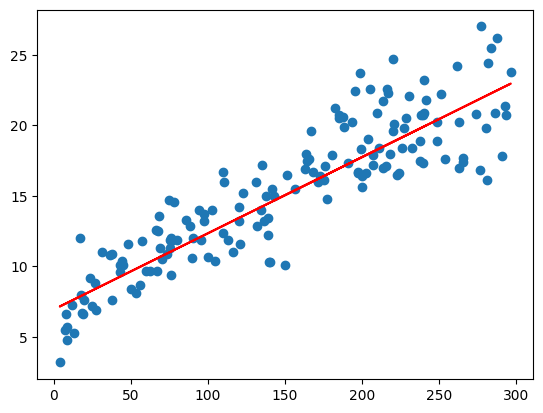

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

Residual Analysis

In [21]:
#checking error
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-22-71e4202828fd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15, color='red')


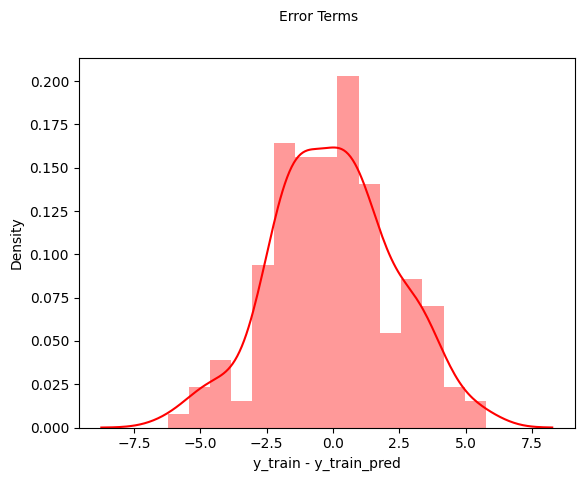

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15, color='red')
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 10)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

# **Prediction on Test Set**

In [23]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [24]:
y_pred.head()

121     8.250864
169    22.526811
194    15.289363
125    11.928735
36     21.591212
dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.287083204106043

In [27]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8555324899673278

Based on the provided R-squared value and RMSE (Root Mean Square Error), here are the conclusions drawn from the regression model:

### Model Fit and Evaluation:
1. **R-squared: 0.8555**: This indicates that the model explains approximately 85.55% of the variability in the dependent variable. This suggests that the model has a very good fit to the data, meaning the independent variables included in the model are highly effective in explaining the variability in the dependent variable.

2. **RMSE: 2.2871**: The Root Mean Square Error represents the standard deviation of the residuals (prediction errors). An RMSE of 2.2871 suggests that, on average, the predictions made by the model are 2.2871 units away from the actual observed values. Lower RMSE values indicate better model performance.

### Overall Conclusions:
- **High R-squared Value**: The model is highly effective at explaining the variation in the dependent variable, indicating a strong relationship between the independent variables and the dependent variable.
- **Reasonable RMSE**: An RMSE of 2.2871, while specific to the context of the data, generally indicates that the model’s predictions are fairly accurate. The lower the RMSE, the better the model's predictive accuracy.

These results collectively suggest that the regression model is robust and reliable for predicting the dependent variable, given the strong explanatory power (high R-squared) and reasonable predictive accuracy (low RMSE).

Visualize the line of regression fit

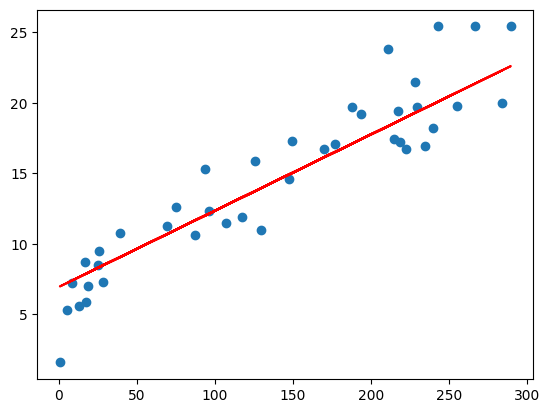

In [28]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()